<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-dataset?scriptVersionId=126097165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-district/ICRISAT-District Level Data (3).csv


In [2]:
df = pd.read_csv('/kaggle/input/rice-district/ICRISAT-District Level Data (3).csv')
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55


In [3]:
df.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000


In [4]:
df.isnull().sum()

Dist Code                      0
Year                           0
State Code                     0
State Name                     0
Dist Name                      0
RICE AREA (1000 ha)            0
RICE PRODUCTION (1000 tons)    0
RICE YIELD (Kg per ha)         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dist Code                    16146 non-null  int64  
 1   Year                         16146 non-null  int64  
 2   State Code                   16146 non-null  int64  
 3   State Name                   16146 non-null  object 
 4   Dist Name                    16146 non-null  object 
 5   RICE AREA (1000 ha)          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)  16146 non-null  float64
 7   RICE YIELD (Kg per ha)       16146 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1009.2+ KB


In [6]:
df.shape

(16146, 8)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
X = df['RICE AREA (1000 ha)']
Y= df['RICE PRODUCTION (1000 tons)']


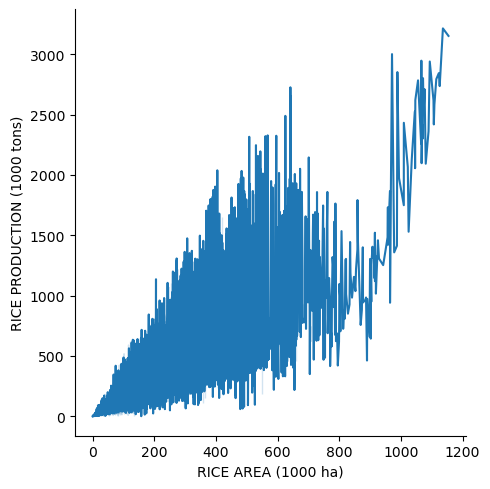

In [9]:
sns.relplot(
    data=df, kind="line",
    x=X, y=Y
)

<AxesSubplot:xlabel='RICE AREA (1000 ha)', ylabel='RICE YIELD (Kg per ha)'>

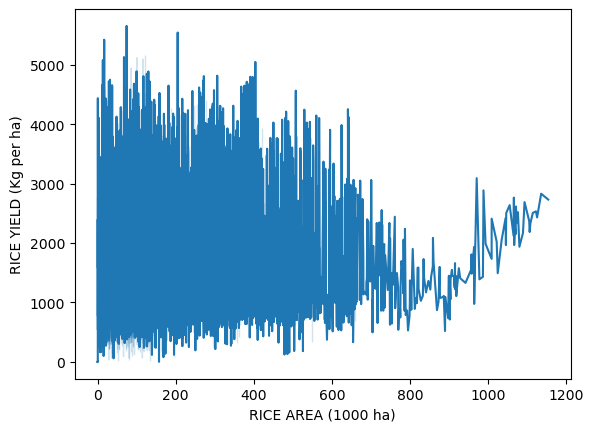

In [10]:
sns.lineplot(
    data=df,
    x="RICE AREA (1000 ha)", y="RICE YIELD (Kg per ha)"
)

<AxesSubplot:xlabel='State Code', ylabel='count'>

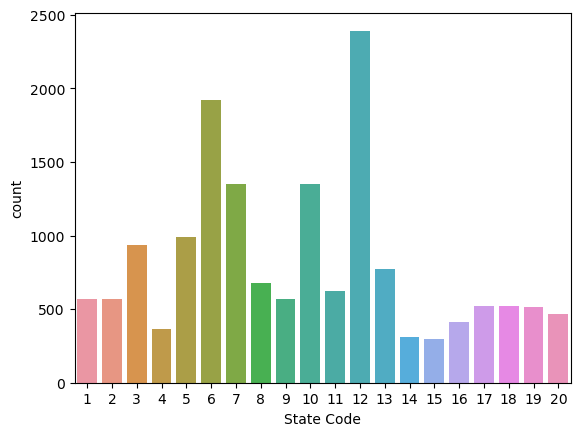

In [11]:
sns.countplot(x="State Code",data=df)

In [12]:
df.corr()['Year']

Dist Code                      0.000284
Year                           1.000000
State Code                     0.000714
RICE AREA (1000 ha)            0.046189
RICE PRODUCTION (1000 tons)    0.232400
RICE YIELD (Kg per ha)         0.388249
Name: Year, dtype: float64

<AxesSubplot:>

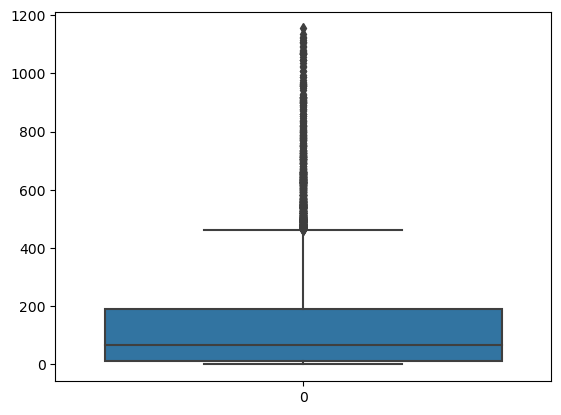

In [13]:
sns.boxplot(df['RICE AREA (1000 ha)'])

<AxesSubplot:>

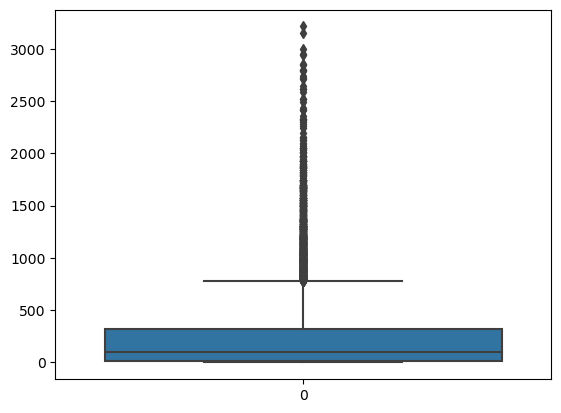

In [14]:
sns.boxplot(df['RICE PRODUCTION (1000 tons)'])

<AxesSubplot:>

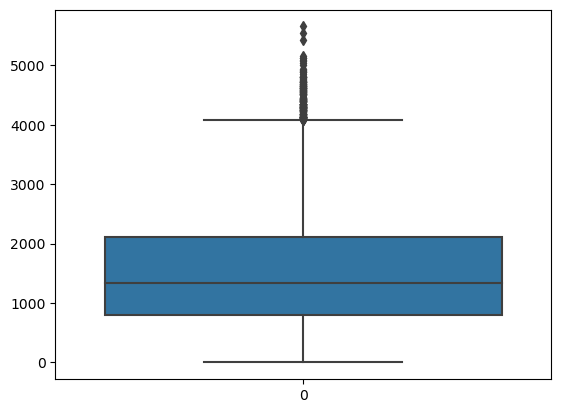

In [15]:
sns.boxplot(df['RICE YIELD (Kg per ha)'])

In [16]:
new = df.groupby('Year').sum().reset_index()
new.head()
new.shape

(52, 6)

In [17]:
new_state = df.groupby('State Name').sum().reset_index()
new_state.shape

(20, 7)

In [18]:
new_state

,State Name,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,Andhra Pradesh,28028,1139138,572,128980.52,315185.40,1337079.18
1,Assam,314860,1035580,8840,121967.69,165205.95,708457.90
2,Bihar,518336,1139138,1144,180424.25,231759.00,730287.40
3,Chhattisgarh,1092,621348,4368,184036.34,208208.22,335014.04
4,Gujarat,121212,1864044,2808,32017.85,48713.35,989691.47
5,Haryana,66196,724906,1456,39273.38,107664.90,796460.55
6,Himachal Pradesh,328276,1035580,9360,4274.54,5426.01,574244.15
7,Jharkhand,274250,597402,4500,69169.78,76435.78,346166.10
8,Karnataka,72124,1967602,4940,64104.46,146921.56,2125721.28
9,Kerala,338596,1027710,9804,27879.92,49567.07,995867.63


In [19]:
new_district  = df.groupby('Dist Name').sum().reset_index()
new_district.shape

(311, 7)

In [20]:
new_district.head()

,Dist Name,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,24 Parganas,41600,103558,676,34545.68,63011.99,94338.40
1,Adilabad,3276,103558,1040,3452.71,6239.48,90097.79
2,Agra,10192,103558,624,296.86,621.62,87800.88
3,Ahmedabad,6292,103558,156,3756.92,6838.34,81729.12
4,Ahmednagar,5304,103558,364,414.30,480.98,58230.56
